In [1]:
import numpy as np
import matplotlib.pyplot as plt
def Left_Endpoint(a,b):
    '''
    This function finds the Absolute error and lograthem of that error in finding area under graph using Left Endpoint rectangular element method for different delta x
    
    Input:
    a- Inital point
    b- final point
    (a,b are point between we need to find the area under graph)
    
    Output:
    return Absolute error,log(Absolute error),dx,log(dx)
    
    '''
    Absolute_error_Left=[]
    DX=[]
    log_error_Left=[]
    log_dx=[]
    for i in range(100):
        Area=0
        dx=(b-a)/(i+2)
        for j in range(i+2):
            Area=Area+dx*(np.sin(a+(j)*dx))
        Absolute_error_Left.append(abs(1-Area))
        log_error_Left.append(np.log(abs(1-Area)))
        log_dx.append(np.log(dx))
        DX.append(dx)
    return Absolute_error_Left,DX,log_error_Left,log_dx

In [2]:
def Right_Endpoint(a,b):
    '''
    This function finds the Absolute error and lograthem of that error in finding area under graph using Right Endpoint rectangular element method for different delta x
    
    Input:
    a- Inital point
    b- final point
    (a,b are point between we need to find the area under graph)
    
    Output:
    return Absolute error,log(Absolute error)
    '''
    Absolute_error_Right=[]
    log_error_Right=[]
    for i in range(100):
        Area=0
        dx=(b-a)/(i+2)
        for j in range(i+2):
            Area=Area+dx*(np.sin(a+(j+1)*dx))
        Absolute_error_Right.append(abs(1-Area))
        log_error_Right.append(np.log(abs(1-Area)))
    return Absolute_error_Right,log_error_Right

In [3]:
def Mid_point(a,b):
    '''
    This function finds the Absolute error and lograthem of that error in finding area under graph using Midpoint rectangular element method for different delta x
    
    Input:
    a- Inital point
    b- final point
    (a,b are point between we need to find the area under graph)
    
    Output:
    return Absolute error,log(Absolute error)
    '''
    Absolute_error_Mid=[]
    log_error_Mid=[]
    for i in range(100):
        Area=0
        dx=(b-a)/(i+2)
        for j in range(i+2):
            Area=Area+dx*(np.sin(((a+(j+1)*dx)+(a+(j)*dx))/2))
        Absolute_error_Mid.append(abs(1-Area))
        log_error_Mid.append(np.log(abs(1-Area)))
    return Absolute_error_Mid,log_error_Mid

In [4]:
def Trapezoid(a,b):
    '''
    This function finds the Absolute error and lograthem of that error in finding area under graph using Trapezoid element method for different delta x
    
    Input:
    a- Inital point
    b- final point
    (a,b are point between we need to find the area under graph)
    
    Output:
    return Absolute error,log(Absolute error)
    '''
    Absolute_error_Trapezoid=[]
    log_error_Trapezoid=[]
    for i in range(100):
        Area=0
        dx=(b-a)/(i+2)
        for j in range(i+2):
            Area=Area+dx*(np.sin(a+(j+1)*dx)+np.sin(a+(j)*dx))*0.5
        Absolute_error_Trapezoid.append(abs(1-Area))
        log_error_Trapezoid.append(np.log(abs(1-Area)))
    return Absolute_error_Trapezoid,log_error_Trapezoid

In [5]:
#Calling all the functions to get values
Absolute_error_Left,dx,log_error_Left,log_dx=Left_Endpoint(0,np.pi/2)
Absolute_error_Right,log_error_Right=Right_Endpoint(0,np.pi/2)
Absolute_error_Mid,log_error_Mid=Mid_point(0,np.pi/2)
Absolute_error_Trapezoid,log_error_Trapezoid=Trapezoid(0,np.pi/2)

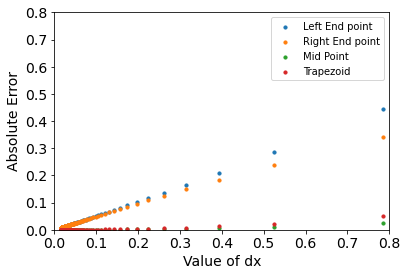

In [6]:
#Ploting Absolute error vs dx graph for all fore methods
plt.scatter(dx,Absolute_error_Left,label="Left End point",s=10)
plt.scatter(dx,Absolute_error_Right,label="Right End point",s=10)
plt.scatter(dx,Absolute_error_Mid,label="Mid Point",s=10)
plt.scatter(dx,Absolute_error_Trapezoid,label="Trapezoid",s=10)
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.xlabel("Value of dx",fontsize=14)
plt.ylabel("Absolute Error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("Error_vs_dx.png")
plt.show()

In [7]:
def linear_regression(x,y):
    '''
    This function finds coefficients of best fit line to the given x and y values using Gaussian Elimination
    
    Input:
    x - x value of data
    y - y value of data
    
    output
    return Coefficient which contain sloap and y intercept
    '''
    A=np.array([x,[1 for i in range (100)]])
    Aa=np.dot(A,A.transpose())
    b=np.dot(A,np.array(y).transpose())
    Aa=Aa.tolist()
    b=b.tolist()
    C=Aa 
    C[0].append(b[0])
    C[1].append(b[1])# C is the Argument matrix
    C=np.array(C)
    for i in range(len(Aa)): #Swaping rows if current rows pivotal element is zero
        if C[i][i]==0:
            for j in range(i+1,len(Aa)):
                if (C[j][i] != 0):
                    t = C[i]
                    C[i] = C[j]
                    C[j] = t
                    break
  #Making pivotal element one and all the other element in that column as zero using row operations
    for i in range(len(Aa)):
        for j in range(len(Aa)):
            if (i==j):
                continue
            p = C[j][i]/C[i][i]
            C[j][:]= C[j][:] - p*C[i][:]
        C[i][:] = C[i][:]/C[i][i]
    Coefficients=C[:,-1]
    return Coefficients

In [8]:
#Call the linear_regression function to find best fit for log(Error) and dx data
C_Left=linear_regression(log_dx,log_error_Left)
C_Right=linear_regression(log_dx,log_error_Right)
C_Mid=linear_regression(log_dx,log_error_Mid)
C_Trapezoid=linear_regression(log_dx,log_error_Trapezoid)

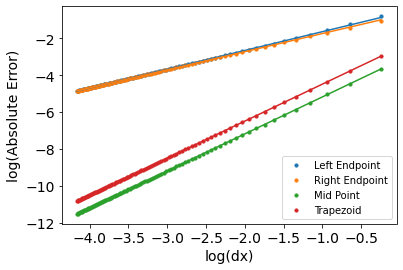

In [9]:
log_error_Left_pred=[]
log_error_Right_pred=[]
log_error_Mid_pred=[]
log_error_Trapezoid_pred=[]
for i in range(100):# Finding the y values using line equation by taking x value as log(dx) and coffecients that we found
    log_error_Left_pred.append(log_dx[i]*C_Left[0]+C_Left[1])
    log_error_Right_pred.append(log_dx[i]*C_Right[0]+C_Right[1])
    log_error_Mid_pred.append(log_dx[i]*C_Mid[0]+C_Mid[1])
    log_error_Trapezoid_pred.append(log_dx[i]*C_Trapezoid[0]+C_Trapezoid[1])
#Ploting the graph
plt.plot(log_dx,log_error_Left_pred)
plt.scatter(log_dx,log_error_Left,label="Left Endpoint",s=10)
plt.plot(log_dx,log_error_Right_pred)
plt.scatter(log_dx,log_error_Right,label="Right Endpoint",s=10)
plt.plot(log_dx,log_error_Mid_pred)
plt.scatter(log_dx,log_error_Mid,label="Mid Point",s=10)
plt.plot(log_dx,log_error_Trapezoid_pred)
plt.scatter(log_dx,log_error_Trapezoid,label="Trapezoid",s=10)
plt.xlabel("log(dx)",fontsize=14)
plt.ylabel("log(Absolute Error)",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("log_error_vs_log_dx.png")
plt.show()

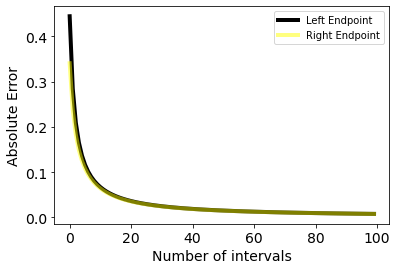

In [17]:
n=[]
for i in range(100):
    n.append(i) 
plt.plot(n,Absolute_error_Left,label="Left Endpoint",linewidth=4,color="black")
plt.plot(n,Absolute_error_Right,label="Right Endpoint",linewidth=4,alpha=0.5,color="yellow")
plt.xlabel("Number of intervals",fontsize=14)
plt.ylabel("Absolute Error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("Error_vs_n.png")
plt.show()